# IAM - Avaliação 01
**Disciplina:** Introdução ao Aprendizado de Máquina (ENGG67)  
**Professor:** Antônio C. L. Fernandes Jr.  
**Aluno(s):** Giovane Santos de Santana, Heverton Silva dos Reis  
**Data de Entrega:** 22/04/2025

---

### Introdução

<justify>
&nbsp&nbsp&nbsp&nbsp
Pesquisadores da universidade de Wisconsin utilizaram técnicas de processamento de imagem e aprendizado de máquina para aumentar a eficiência de um exame para diagnosticar câncer de mama. Neste trabalho será estudado o conjunto de dados que foi utilizado para esse projeto.<br>
&nbsp&nbsp&nbsp&nbsp
Para a pesquisa realizaram aspiração do fluído de um tumor de mama com agulha fina, aplicaram em uma placa de esfragaço e tingiram. A partir disso capturaram uma imagem com uso de uma câmera e um microscópio.<br><br>
<center><img src='https://drive.google.com/uc?export=view&id=1Nr3OxDyj1QRQEO7h6Dz61CaUgfbATeYD' width='70%'> <br>
Bordas do núcleo das células que foram selecionadas.</center><br>
&nbsp&nbsp&nbsp&nbsp
Com a imagem um usuário seleciona as bordas do núcleo das células e com tecnologia de modelo de contorno "snake" as bordas são localizadas. O modelo snake constrói os pontos nas bordas e o centróide do núcleo celular.<br><br>
<center><img src='https://drive.google.com/uc?export=view&id=19-pjczZj6s4fGX14ThWfpg-pm5sWSXtR' width='70%'> <br>
Bordas do núcleo das células que foram localizadas pelo snake.</center><br>
&nbsp&nbsp&nbsp&nbsp
A partir dos pontos localizados são calculados os atributos do conjunto de dados. No total são dez atributos diferentes raio, perímetro, compacidade, suavidade, concavidade, pontos de concavidade e dimensão fractal que são repetidos três vezes para representar a média o erro padrão e os valores extremos do atributo(média dos três maiores valores) para cada imagem, totalizando trinta atributos no conjunto de dados.
</justify>

---
### Conjunto de Dados: Breast Cancer Wisconsin (Diagnostic)
[Link para o dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

---



![image.png](attachment:d66da048-9904-4948-add8-6a4b74d72140.png)

Antes de começar a análise, é preciso instalar todas as bibliotecas que serão utilizadas:

In [ ]:
pip install ucimlrepo

In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Em seguida, é preciso carregar o dataset, através de importação direta, como indicado pela documentação do repositório:

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
df = breast_cancer_wisconsin_diagnostic.data.features
dt = breast_cancer_wisconsin_diagnostic.data.targets

Por fim, realiza-se a importação das bibliotecas que serão utilizadas ao longo da análise:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### a) O conjunto de dados é univariado ou multivariado? Descreva a quantidade de atributos preditivos e atributos alvo.

Para avaliar se o conjunto de dados em análise são **univariados** ou **multivariados** é preciso expandir suas variáveis:

In [ ]:
# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

Através dessa expansão, percebe-se que o conjunto de dados é **multivariado**, pois entre suas variáveis verificou-se a ocorrência de até **30 atributos preditivos** (identificados no dataset com o papel de `Feature`). Dentre os outros atributos, o atributo que possuiu o papel de **alvo** (`Target`) é o atributo **Diagnosis**.

### b)  Caracterize os dados quanto ao Tipo e Escala.

Para definir o **Tipo** e **Escala** dos dados, pode-se começar verificando os tipos dos **atributos preditivos** através do comando *dtypes* da biblioteca *Pandas*:

In [ ]:
# Ver os tipos de dados diretamente do DataFrame
df.dtypes

,0
radius1,float64
texture1,float64
perimeter1,float64
area1,float64
smoothness1,float64
compactness1,float64
concavity1,float64
concave_points1,float64
symmetry1,float64
fractal_dimension1,float64


Logo, é possível concluir que os **atributos preditivos** são do tipo **numérico contínuo**.

Já para o **atributo alvo**, optou-se por plotar as primeiras linhas do DataFrame através do comando `head()`, que revelou que esse atributo é do tipo **categórico**.

In [ ]:
# Ver os dados das primeiras linhas do DataFrame
dt.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


Quanto a escala, para o atributo alvo, é imedato perceber que se tratam de valores **nominais**. Já para os atributos preditivos, é preciso prestar atenção ao contexto e perceber que eles fazem alusão a atributos geométricos como área, perímetro, concavidade, simetria, entre outros. Ou seja, esses atributos carregam significado absoluto, portanto tais atributos são da escala **racional**.

### c) Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados (calcule, para cada atributo, suas estatísticas univariadas pertinentes dentre frequência, moda, média, mediana, desvio-padrão, Q1, Q3, obliquidade e curtose).

Para verificar se o conjunto precisa de um balancemanto, pode-se começar analisando a distribuição das classes de `Diagnosis`, o **atributo alvo**.

In [ ]:
# Ver distribuição das classes do diagnóstico
dt['Diagnosis'].value_counts()

,count
Diagnosis,
B,357
M,212


Tem-se que existem **357 amostras** da classe **B (Benigno)** e **212 amostras** da classe **M (Maligino)**, num **total de 569 amostras**. Ao verificar a proporção das amostras, observou-se que:
<br>
<br>
<br>
$Classe B = \frac{357}{569} \times 100 = 62.7 \%$ e $Classe A = \frac{212}{569} \times 100 = 37.3 \%$

In [ ]:
# Selecionar apenas os atributos preditivos

# Estatísticas básicas
descricao = pd.DataFrame()
descricao['Média'] = df.mean()
descricao['Mediana'] = df.median()
descricao['Moda'] = df.mode().iloc[0]
descricao['Desvio Padrão'] = df.std()
descricao['Q1 (25%)'] = df.quantile(0.25)
descricao['Q3 (75%)'] = df.quantile(0.75)
descricao['Obliquidade'] = df.skew()
descricao['Curtose'] = df.kurt()

# Exibir as variáveis
descricao.head(30)

,Média,Mediana,Moda,Desvio Padrão,Q1 (25%),Q3 (75%),Obliquidade,Curtose
radius1,14.127292,13.370000,12.340000,3.524049,11.700000,15.780000,0.942380,0.845522
texture1,19.289649,18.840000,14.930000,4.301036,16.170000,21.800000,0.650450,0.758319
perimeter1,91.969033,86.240000,82.610000,24.298981,75.170000,104.100000,0.990650,0.972214
area1,654.889104,551.100000,512.200000,351.914129,420.300000,782.700000,1.645732,3.652303
smoothness1,0.096360,0.095870,0.100700,0.014064,0.086370,0.105300,0.456324,0.855975
compactness1,0.104341,0.092630,0.114700,0.052813,0.064920,0.130400,1.190123,1.650130
concavity1,0.088799,0.061540,0.000000,0.079720,0.029560,0.130700,1.401180,1.998638
concave_points1,0.048919,0.033500,0.000000,0.038803,0.020310,0.074000,1.171180,1.066556
symmetry1,0.181162,0.179200,0.160100,0.027414,0.161900,0.195700,0.725609,1.287933
fractal_dimension1,0.062798,0.061540,0.056670,0.007060,0.057700,0.066120,1.304489,3.005892


### d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído

Uma estatégia que pode ser utilizada para avaliar o conjunto de dados quanto à sua **incompletude** é verificar a existência de **valores nulos** entre os atributos. Isso pode ser feito atraves do comando `isnull()` do pandas. Ao se fazer um **somatório desses valores**, se o valor for 0 para cada uma das colunas, então **não existe incompletude** para esses atributos. Começa-se com os atributos preditivos:


In [ ]:
# Verificar valores nulos em cada coluna
df.isnull().sum()

,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


O mesmo pode ser feito para o atributo alvo:

In [ ]:
# Verificar valores nulos em cada coluna
dt.isnull().sum()

,0
Diagnosis,0


Assim, pode-se concluir que não existem incompletudes entre os valores do dataset.

Já para verificar o conjunto em relação às **incosistências**, pode-se partir da análise já realizada anteriormente sobre os **Tipo** e a **Escala** dos dados. Como visto, os atributos preditivos representam valores **numéricos contínuos e absolutos**, mais especificamente, tratam de **medidas físicas** as quais **não se aplicam valores negativos** (a exemplo de área, raio, concavidade, etc.). Logo, assim como na abordagem anterior, pode-se verificar a existência desses valores e calcular seu somatório. Novamente, busca-se que o valor seja 0, para que não hajam incosistências:

In [ ]:
# Verificar valores negativos dos atributos preditivos
(df < 0).sum()


,0
radius1,0
texture1,0
perimeter1,0
area1,0
smoothness1,0
compactness1,0
concavity1,0
concave_points1,0
symmetry1,0
fractal_dimension1,0


Então, tem-se que os valores dos atributos preditivos são consistentes.

Quanto a redundânicia, uma forma de avaliar isso é possível aplicar uma **matriz de correlação**, e verificar os atributos que possuem uma correlação **próxima de 1**. Essa característica estatística pode indicar atributos que trazem informações semelhantes, e, que um deles poderia ser removido, a depender da análise.

In [ ]:
# Matriz de correlação
cor = df.corr().abs()

# Verificar redundância: pares com correlação alta (> 0.9)
redundantes = cor.where((cor > 0.9) & (cor < 1.0))
redundantes.dropna(how='all', axis=0).dropna(how='all', axis=1)

,radius1,texture1,perimeter1,area1,concavity1,concave_points1,radius2,perimeter2,area2,radius3,texture3,perimeter3,area3,concave_points3
radius1,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,0.969539,NaN,0.965137,0.941082,NaN
texture1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.912045,NaN,NaN,NaN
perimeter1,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,0.969476,NaN,0.970387,0.941550,NaN
area1,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,0.962746,NaN,0.959120,0.959213,NaN
concavity1,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave_points1,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155
radius2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,0.951830,NaN,NaN,NaN,NaN,NaN
perimeter2,NaN,NaN,NaN,NaN,NaN,NaN,0.972794,NaN,0.937655,NaN,NaN,NaN,NaN,NaN
area2,NaN,NaN,NaN,NaN,NaN,NaN,0.951830,0.937655,NaN,NaN,NaN,NaN,NaN,NaN
radius3,0.969539,NaN,0.969476,0.962746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.993708,0.984015,NaN


Ao fazer isso com os atributos preditivos, como esperado, verificou-se que existem correlações altas entre atributos físicos, como **área, perímetro e raio**, por exemplo. Logo, alguns desses valores poderiam ser desprezados na análise de alguns modelos, como os de regressão linear por exemplo.

### e) Calcule estatísticas multivariadas de covariância e correlação para os atributos quantitativos presentes. Interprete os valores obtidos.

In [ ]:
# Calcular matriz de covariância
matriz_cov = df.cov()
matriz_cov.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,12.42,4.91,85.45,1224.48,0.01,0.09,0.19,0.11,0.01,-0.01,...,16.51,6.43,114.29,1888.23,0.01,0.23,0.39,0.17,0.04,0.00
texture1,4.91,18.50,34.44,485.99,-0.00,0.05,0.10,0.05,0.01,-0.00,...,7.33,24.11,51.75,841.28,0.01,0.19,0.27,0.08,0.03,0.01
perimeter1,85.45,34.44,590.44,8435.77,0.07,0.71,1.39,0.80,0.12,-0.04,...,113.86,45.26,792.33,13026.15,0.08,1.74,2.86,1.23,0.28,0.02
area1,1224.48,485.99,8435.77,123843.55,0.88,9.26,19.24,11.24,1.46,-0.70,...,1637.52,621.82,11341.79,192192.56,0.99,21.62,37.63,16.70,3.13,0.02
smoothness1,0.01,-0.00,0.07,0.88,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.11,1.66,0.00,0.00,0.00,0.00,0.00,0.00
compactness1,0.09,0.05,0.71,9.26,0.00,0.00,0.00,0.00,0.00,0.00,...,0.14,0.08,1.05,15.32,0.00,0.01,0.01,0.00,0.00,0.00
concavity1,0.19,0.10,1.39,19.24,0.00,0.00,0.01,0.00,0.00,0.00,...,0.27,0.15,1.95,30.68,0.00,0.01,0.01,0.00,0.00,0.00
concave_points1,0.11,0.05,0.80,11.24,0.00,0.00,0.00,0.00,0.00,0.00,...,0.16,0.07,1.12,17.89,0.00,0.00,0.01,0.00,0.00,0.00
symmetry1,0.01,0.01,0.12,1.46,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.20,2.77,0.00,0.00,0.00,0.00,0.00,0.00
fractal_dimension1,-0.01,-0.00,-0.04,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.01,-0.00,-0.05,-0.93,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Calcular matriz de correlação
matriz_cor = df.corr()
matriz_cor.round(2)  # Visualizar parte da matriz

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture1,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter1,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area1,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness1,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness1,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity1,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points1,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry1,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension1,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


Como é possível perceber, como os dados são volumosos, fica difícil obter respostas através dessas duas medidas estatíticas apenas visualizando os resultados brutos das operações de **covariância** e **correlação**. Assim, faz-se necessária uma abordagem gráfica. Uma opção é utilizar os valores da matriz de correlação (a normalização da covariância) para gerar um **mapa de calor**:

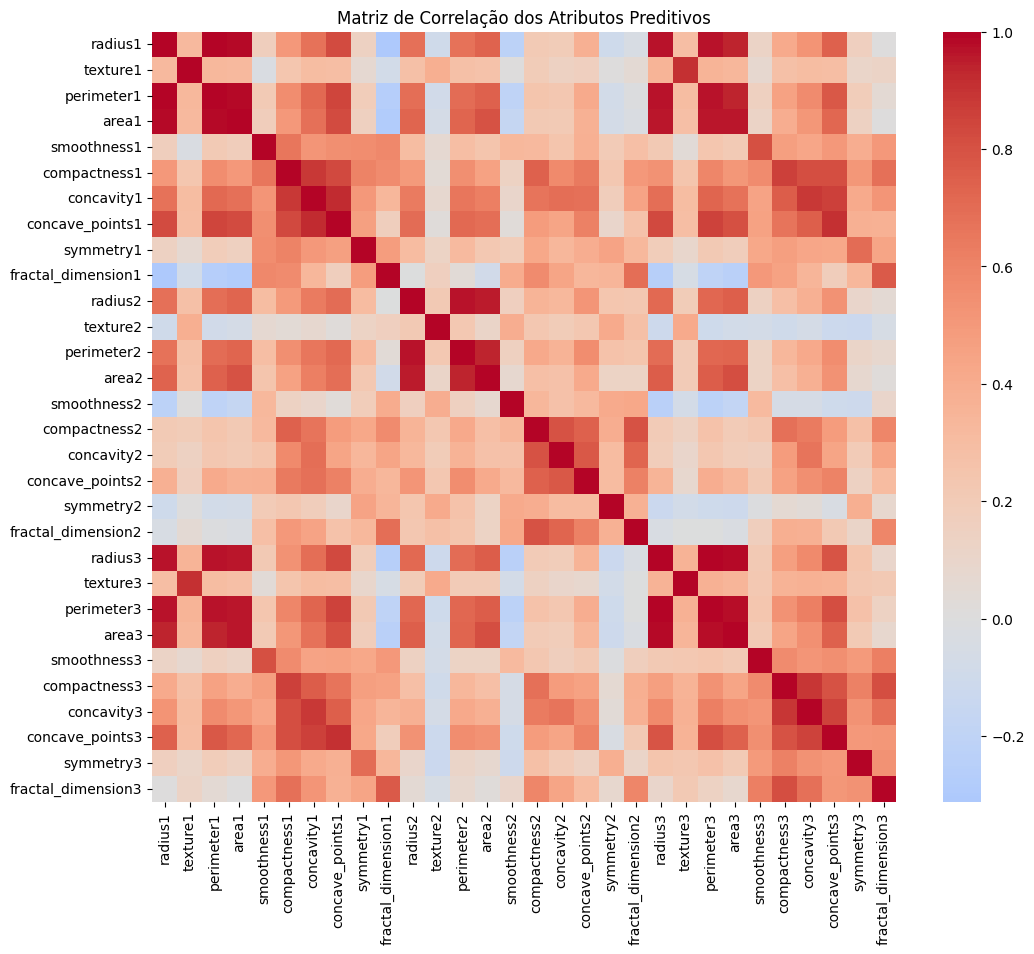

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(matriz_cor, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlação dos Atributos Preditivos")
plt.show()

Como já foi percebido anteriormente nesta análise, os valores de dimensões físicas como **área, perímetro e raio** possuem alta correlação entre si, o que é esperado, visto que qualquer mudança em uma dessas medidas afeta as outras. Logo, a depender da análise, alguns desses parâmetros poderiam ser removidos. Já outros como **suavidade, simetria e dimensão fractal** possuem menos correlação com os atributos físicos, mas mais, umas com as outras, o que indica que talvez possam ser avaliadas em separado.

### f) Trace boxplots dos atributos preditivos e identifique a presença ou não de outliers.

Todos os atributos possuem outliers exceto os valores extremos do atributo **Pontos Côncavos**

In [ ]:
pedaco_descricao = pd.DataFrame([descricao['Q1 (25%)'],descricao.Mediana,descricao['Q3 (75%)'],descricao.Obliquidade,descricao.Curtose,descricao.Moda,descricao.Média])

<Axes: xlabel='RaioErroPadrao'>

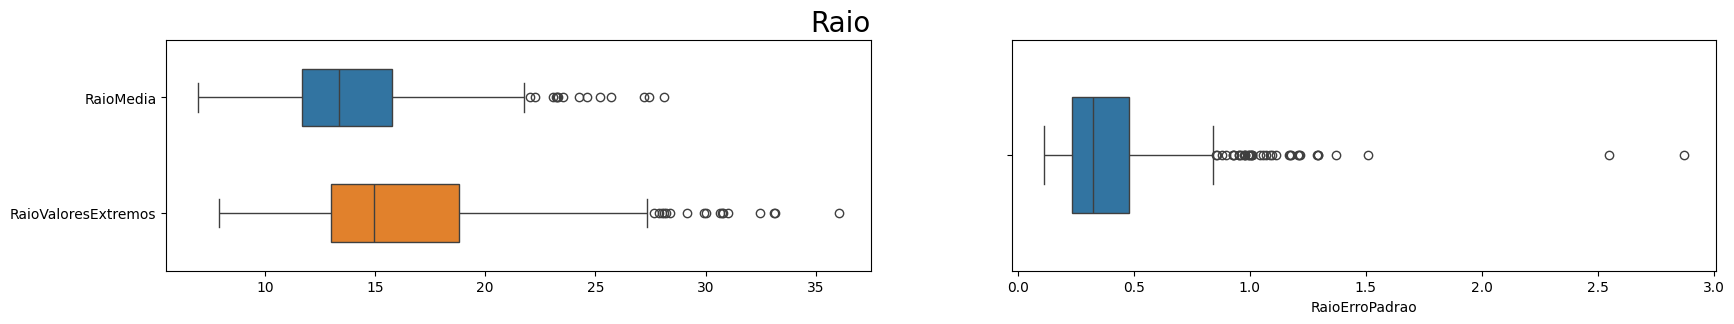

In [ ]:
raio_df = pd.DataFrame()
raio_df["RaioMedia"] = df.radius1
raio_df["RaioErroPadrao"] = df.radius2
raio_df["RaioValoresExtremos"] = df.radius3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_1 = sns.boxplot(data = [raio_df.RaioMedia,raio_df.RaioValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_1.set_title("Raio",fontsize = 20,loc="right")
boxplot_1 = sns.boxplot(data = raio_df.RaioErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_1

In [ ]:
tabela_raio = pd.DataFrame([pedaco_descricao.radius1,pedaco_descricao.radius3,pedaco_descricao.radius2])
tabela_raio.rename({"radius1": "RaioMedia","radius2": "RaioErroPadrao","radius3": "RaioValoresExtremos"},axis=0,inplace=True)
tabela_raio

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,11.7000,13.3700,15.7800,0.942380,0.845522,12.3400,14.127292
RaioValoresExtremos,13.0100,14.9700,18.7900,1.103115,0.944090,12.3600,16.269190
RaioErroPadrao,0.2324,0.3242,0.4789,3.088612,17.686726,0.2204,0.405172


#### Outliers do raio

Existem muitos outliers no conjunto de dados, o que compromete os resultados de alguns testes estatísticos sobre esse atributo.

#### Distribuição do raio
<justify>
Todos os atributos do raio indicam uma distribuição relativamente assimétrica à direita, o que é possível de se perceber devido a distância da mediana em relação ao primeiro quartil.
</justify>

#### Dispersão do raio
<justify>
Os valores extremos estão relativamente dispersos e o erro padrão está relativamente concentrado.
</justify>


<Axes: xlabel='TexturaErroPadrao'>

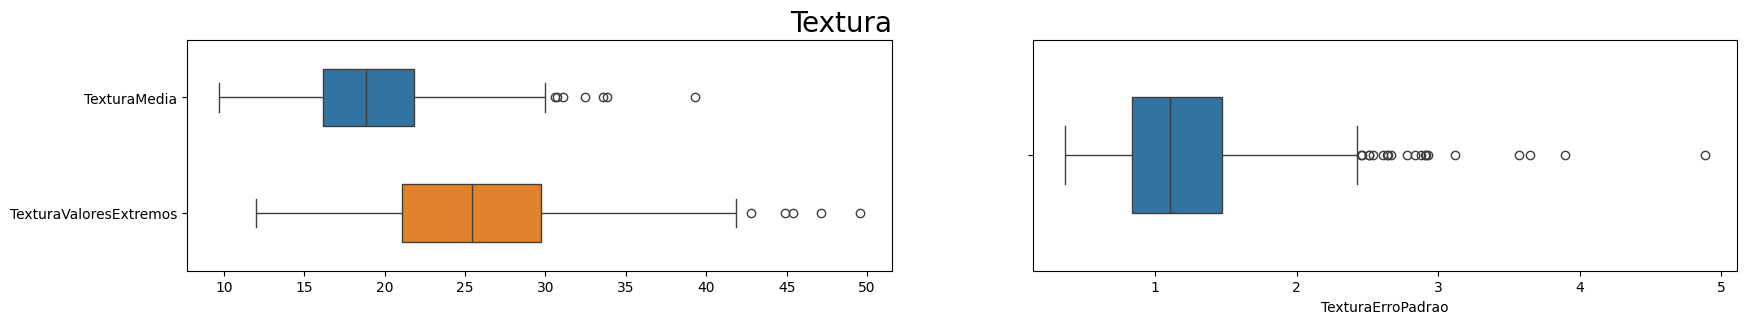

In [ ]:
textura_df = pd.DataFrame()
textura_df["TexturaMedia"] = df.texture1
textura_df["TexturaErroPadrao"] = df.texture2
textura_df["TexturaValoresExtremos"] = df.texture3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_2 = sns.boxplot(data = [textura_df.TexturaMedia, textura_df.TexturaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_2.set_title("Textura",fontsize = 20,loc="right")
boxplot_2 = sns.boxplot(data = textura_df.TexturaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_2

In [ ]:
tabela_textura = pd.DataFrame([pedaco_descricao.texture1,pedaco_descricao.texture3,pedaco_descricao.texture2])
tabela_textura.rename({"texture1": "TexturaMedia","texture2": "TexturaErroPadrao","texture3": "TexturaValoresExtremos"},axis=0,inplace=True)
tabela_textura

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,16.1700,18.840,21.800,0.650450,0.758319,14.9300,19.289649
TexturaValoresExtremos,21.0800,25.410,29.720,0.498321,0.224302,17.7000,25.677223
TexturaErroPadrao,0.8339,1.108,1.474,1.646444,5.349169,0.8561,1.216853


#### Outliers da textura

A presença de outliers é pouco significativa tendo pouco impacto sobre os testes estatísticos.

#### Distribuição da textura

Os valores extremos e a média indicam uma distribuição simétrica e o erro padrão apresenta uma leve assimetria à direita.

#### Dispersão da textura
Os valores extremos apresentam uma dispersão maior que média da textura.


<Axes: xlabel='PerimetroErroPadrao'>

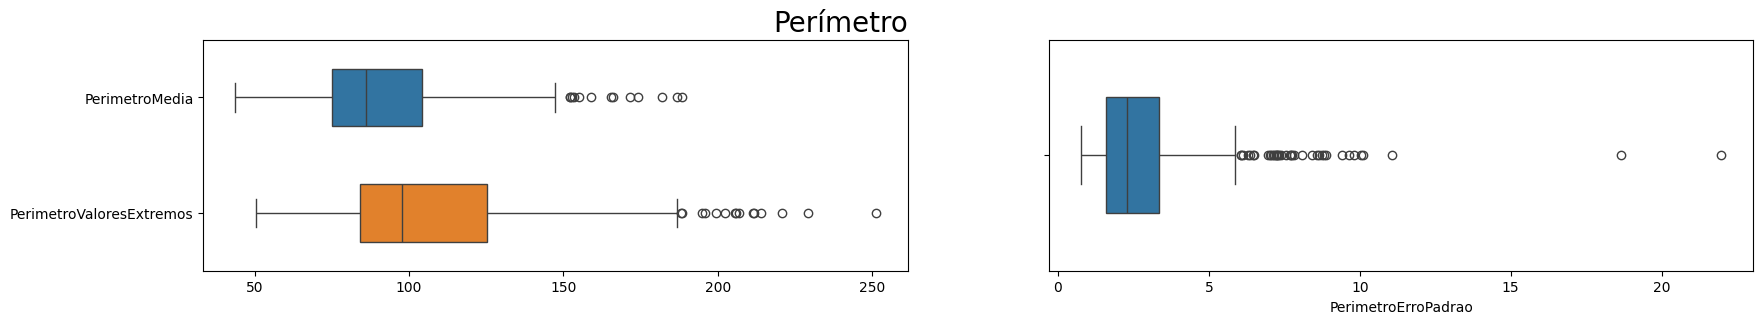

In [ ]:
perimetro_df = pd.DataFrame()
perimetro_df["PerimetroMedia"] = df.perimeter1
perimetro_df["PerimetroErroPadrao"] = df.perimeter2
perimetro_df["PerimetroValoresExtremos"] = df.perimeter3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_3 = sns.boxplot(data = [perimetro_df.PerimetroMedia,perimetro_df.PerimetroValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_3.set_title("Perímetro",fontsize = 20,loc="right")
boxplot_3 = sns.boxplot(data = perimetro_df.PerimetroErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_3

In [ ]:
tabela_perimetro = pd.DataFrame([pedaco_descricao.perimeter1,pedaco_descricao.perimeter3,pedaco_descricao.perimeter2])
tabela_perimetro.rename({"perimeter1": "PerimetroMedia","perimeter2": "PerimetroErroPadrao","perimeter3": "PerimetroValoresExtremos"},axis=0,inplace=True)
tabela_perimetro

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,75.170,86.240,104.100,0.990650,0.972214,82.610,91.969033
PerimetroValoresExtremos,84.110,97.660,125.400,1.128164,1.070150,101.700,107.261213
PerimetroErroPadrao,1.606,2.287,3.357,3.443615,21.401905,1.778,2.866059


#### Outliers do perímetro

A presença de outliers é significativa.

#### Distribuição do perímetro

Todos os atributos indicam uma distribuição relativamente assimétrica à direita.

#### Dispersão do perímetro

Os valores extremos apresentam uma dispersão maior que média do atributo e o erro padrão está relativamente concentrado.

<Axes: xlabel='AreaErroPadrao'>

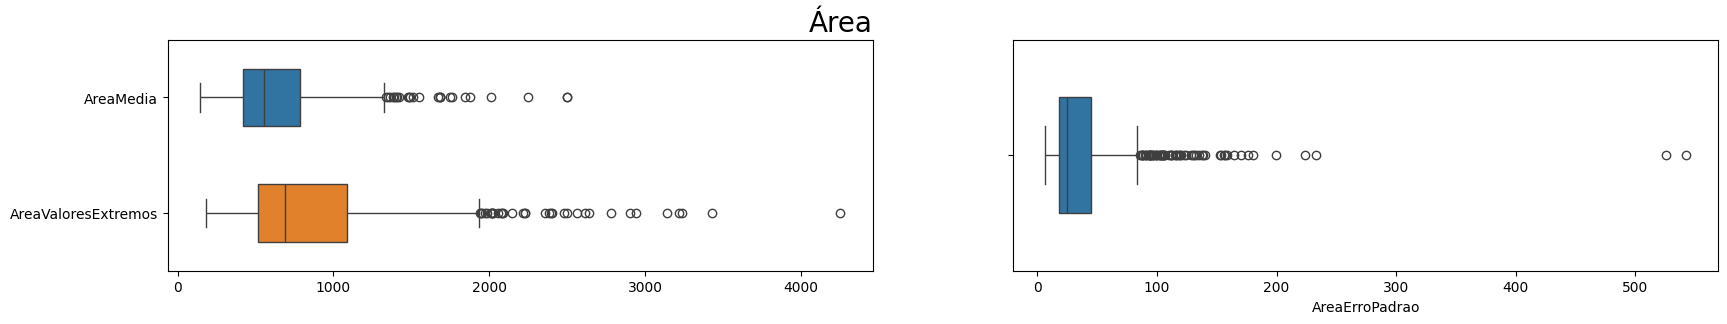

In [ ]:
area_df = pd.DataFrame()
area_df["AreaMedia"] = df.area1
area_df["AreaErroPadrao"] = df.area2
area_df["AreaValoresExtremos"] = df.area3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_4 = sns.boxplot(data = [area_df.AreaMedia,area_df.AreaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_4.set_title("Área",fontsize = 20,loc="right")
boxplot_4 = sns.boxplot(data = area_df.AreaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_4

In [ ]:
tabela_area = pd.DataFrame([pedaco_descricao.area1,pedaco_descricao.area3,pedaco_descricao.area2])
tabela_area.rename({"area1": "AreaMedia","area2": "AreaErroPadrao","area3": "AreaValoresExtremos"},axis=0,inplace=True)
tabela_area

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,420.30,551.10,782.70,1.645732,3.652303,512.20,654.889104
AreaValoresExtremos,515.30,686.50,1084.00,1.859373,4.396395,284.40,880.583128
AreaErroPadrao,17.85,24.53,45.19,5.447186,49.209077,16.64,40.337079


#### Outliers da área

A presença de outliers é a maior de todo o dataset, sendo o atributo mais comprometido.

#### Distribuição da área

A média da área indica uma distribuição relativamente assimétrica à direita, os valores extremos e o erro padrão indicam uma grande assimetria à direita.

#### Dispersão da área

Os valores extremos estão relativamente dispersos e o erro padrão está relativamente concentrado.  

<Axes: xlabel='SuavidadeErroPadrao'>

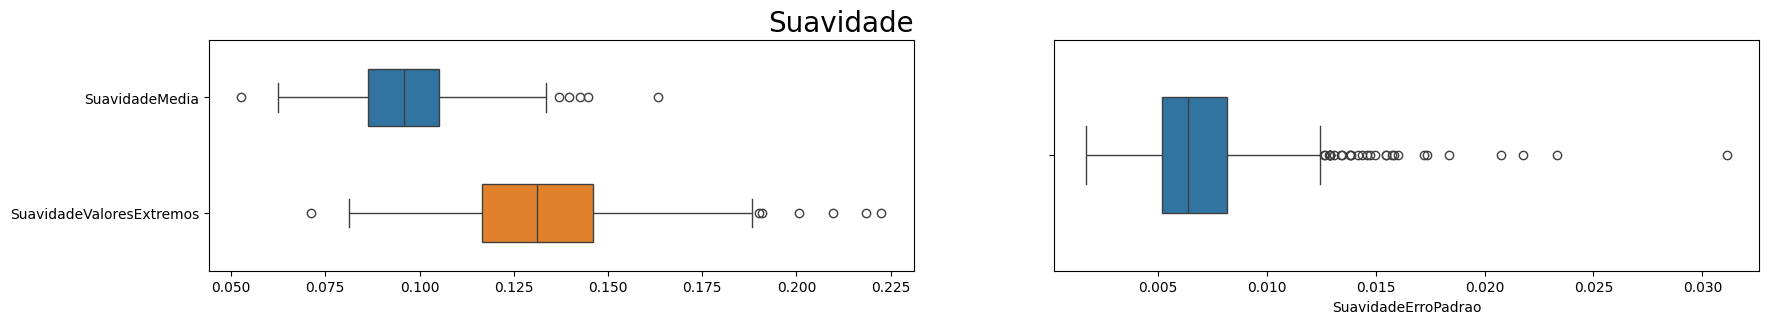

In [ ]:
suavidade_df = pd.DataFrame()
suavidade_df["SuavidadeMedia"] = df.smoothness1
suavidade_df["SuavidadeErroPadrao"] = df.smoothness2
suavidade_df["SuavidadeValoresExtremos"] = df.smoothness3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_5 = sns.boxplot(data = [suavidade_df.SuavidadeMedia,suavidade_df.SuavidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_5.set_title("Suavidade",fontsize = 20,loc="right")
boxplot_5 = sns.boxplot(data = suavidade_df.SuavidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_5

In [ ]:
tabela_suavidade = pd.DataFrame([pedaco_descricao.smoothness1,pedaco_descricao.smoothness3,pedaco_descricao.smoothness2])
tabela_suavidade.rename({"smoothness1": "SuavidadeMedia","smoothness2": "SuavidadeErroPadrao","smoothness3": "SuavidadeValoresExtremos"},axis=0,inplace=True)
tabela_suavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.086370,0.09587,0.105300,0.456324,0.855975,0.10070,0.096360
SuavidadeValoresExtremos,0.116600,0.13130,0.146000,0.415426,0.517825,0.12160,0.132369
SuavidadeErroPadrao,0.005169,0.00638,0.008146,2.314450,10.469840,0.00508,0.007041


#### Outliers da suavidade

A presença de outliers é pouco significativa.

#### Distribuição da suavidade

Os valores extremos e a média do atributo indicam uma distribuição simétrica e o erro padrão indica uma leve assimetria à direita.

#### Dispersão da suavidade

Os valores extremos estão um pouco mais dispersos que o erro padrão e a média do atributo.

<Axes: xlabel='CompacidadeErroPadrao'>

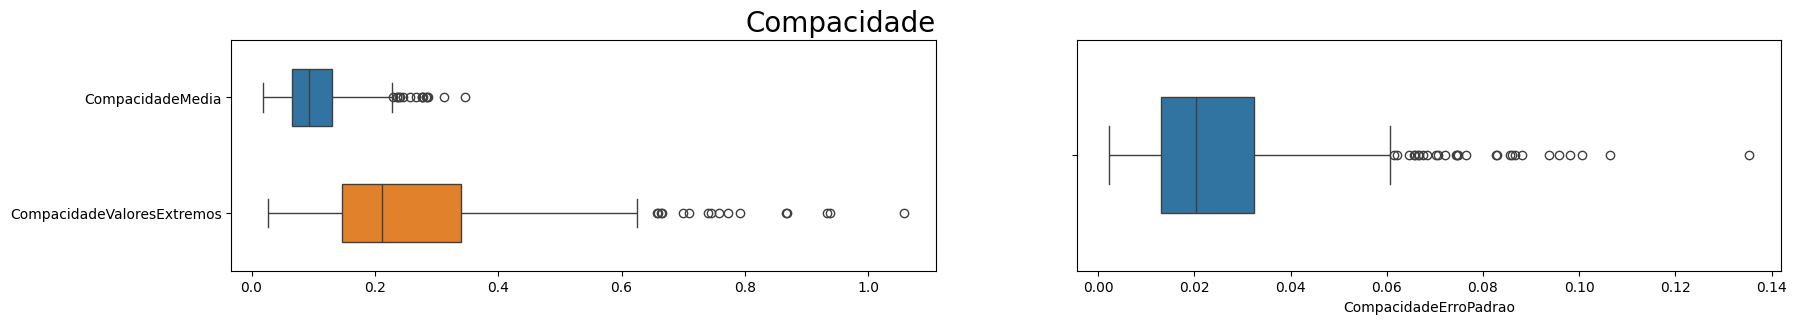

In [ ]:
compacidade_df = pd.DataFrame()
compacidade_df["CompacidadeMedia"] = df.compactness1
compacidade_df["CompacidadeErroPadrao"] = df.compactness2
compacidade_df["CompacidadeValoresExtremos"] = df.compactness3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_6 = sns.boxplot(data = [compacidade_df.CompacidadeMedia,compacidade_df.CompacidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_6.set_title("Compacidade",fontsize = 20,loc="right")
boxplot_6 = sns.boxplot(data = compacidade_df.CompacidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_6

In [ ]:
tabela_compacidade = pd.DataFrame([pedaco_descricao.concavity1,pedaco_descricao.concavity3,pedaco_descricao.concavity2])
tabela_compacidade.rename({"concavity1": "CompacidadeMedia","concavity2": "CompacidadeErroPadrao","concavity3": "CompacidadeValoresExtremos"},axis=0,inplace=True)
tabela_compacidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
CompacidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
CompacidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### Outliers da compacidade

A presença de outliers é muito significativa.

#### Distribuição da compacidade

Todos os atributos indicam uma leve assimetria à direita.

#### Dispersão da compacidade

A média está concentrada e os valores extremos estão dispersos.

<Axes: xlabel='ConcavidadeErroPadrao'>

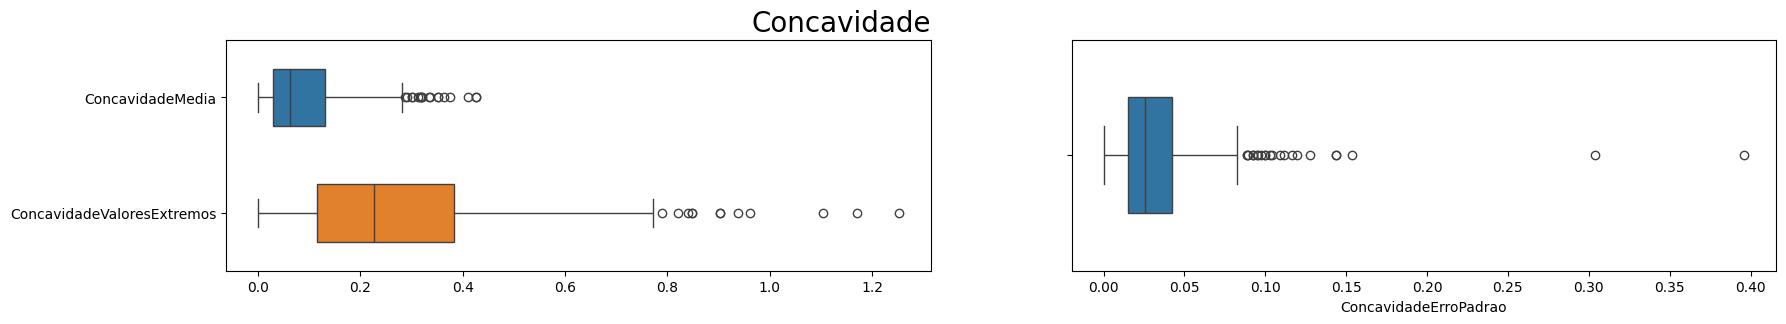

In [ ]:
concavidade_df = pd.DataFrame()
concavidade_df["ConcavidadeMedia"] = df.concavity1
concavidade_df["ConcavidadeErroPadrao"] = df.concavity2
concavidade_df["ConcavidadeValoresExtremos"] = df.concavity3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_7 = sns.boxplot(data = [concavidade_df.ConcavidadeMedia,concavidade_df.ConcavidadeValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_7.set_title("Concavidade",fontsize = 20,loc="right")
boxplot_7 = sns.boxplot(data = concavidade_df.ConcavidadeErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_7

In [ ]:
tabela_concavidade = pd.DataFrame([pedaco_descricao.concavity1,pedaco_descricao.concavity3,pedaco_descricao.concavity2])
tabela_concavidade.rename({"concavity1": "ConcavidadeMedia","concavity2": "ConcavidadeErroPadrao","concavity3": "ConcavidadeValoresExtremos"},axis=0,inplace=True)
tabela_concavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
ConcavidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
ConcavidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### Outliers da concavidade

A presença de outliers é pouco significativa.

#### Distribuição da convavidade

Todos os atributos indicam uma assimetria à direita, sendo menor nos valores extremos e maior na média.

#### Dispersão da concavidade

A média e o erro padrão do atributo estão concentrados e os valores extremos estão dispersos.

<Axes: xlabel='PontosConcavosErroPadrao'>

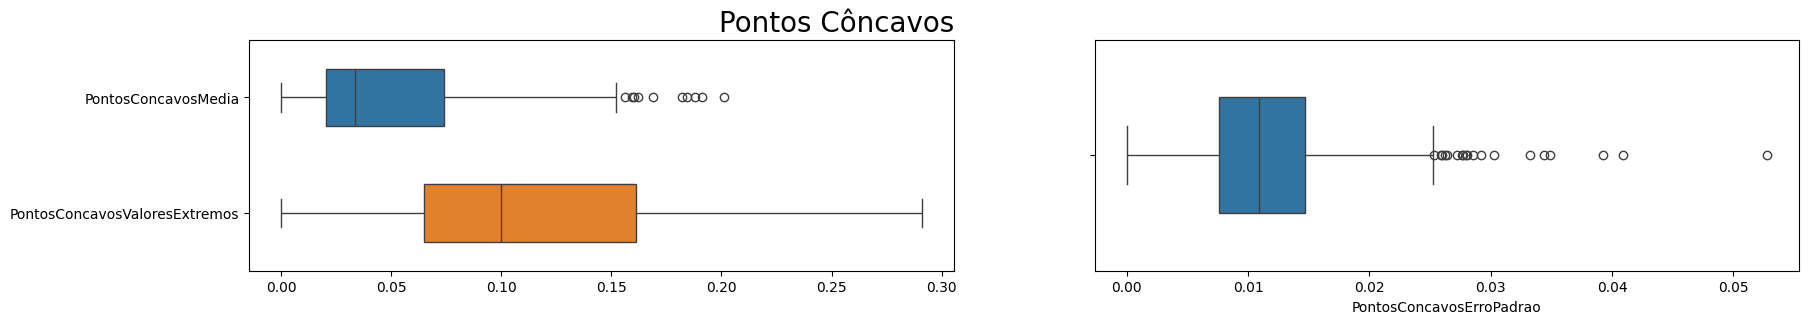

In [ ]:
pontos_concavos_df = pd.DataFrame()
pontos_concavos_df["PontosConcavosMedia"] = df.concave_points1
pontos_concavos_df["PontosConcavosErroPadrao"] = df.concave_points2
pontos_concavos_df["PontosConcavosValoresExtremos"] = df.concave_points3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_8 = sns.boxplot(data = [pontos_concavos_df.PontosConcavosMedia,pontos_concavos_df.PontosConcavosValoresExtremos], orient = "h", width=0.5,ax = eixo[0])
boxplot_8.set_title("Pontos Côncavos",fontsize = 20,loc="right")
boxplot_8 = sns.boxplot(data = pontos_concavos_df.PontosConcavosErroPadrao, orient = "h", width=0.5,ax = eixo[1])

boxplot_8

In [ ]:
tabela_ponto_concavos = pd.DataFrame([pedaco_descricao.concave_points1,pedaco_descricao.concave_points3,pedaco_descricao.concave_points2])
tabela_ponto_concavos.rename({"concave_points1": "PontosConcavosMedia","concave_points2": "PontosConcavosErroPadrao","concave_points3": "PontosConcavosValoresExtremos"},axis=0,inplace=True)
tabela_ponto_concavos

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.020310,0.03350,0.07400,1.171180,1.066556,0.0,0.048919
PontosConcavosValoresExtremos,0.064930,0.09993,0.16140,0.492616,-0.535535,0.0,0.114606
PontosConcavosErroPadrao,0.007638,0.01093,0.01471,1.444678,5.126302,0.0,0.011796


#### Outliers dos pontos côncavos

A presença de outliers é pouco significativa na média do atributo e não há outliers para os valores extremos.

#### Distribuição dos pontos côncavos

A média e os valores extremos indicam assimetria à direita, sendo mais atenuado na média do atributo. O erro padrão indica uma simetria.

#### Dispersão dos pontos côncavos

Todos os atributos estão dispersos, sendo muito leve no erro padrão e muito atenuado nos valores extremos.

<Axes: xlabel='SimetriaErroPadrao'>

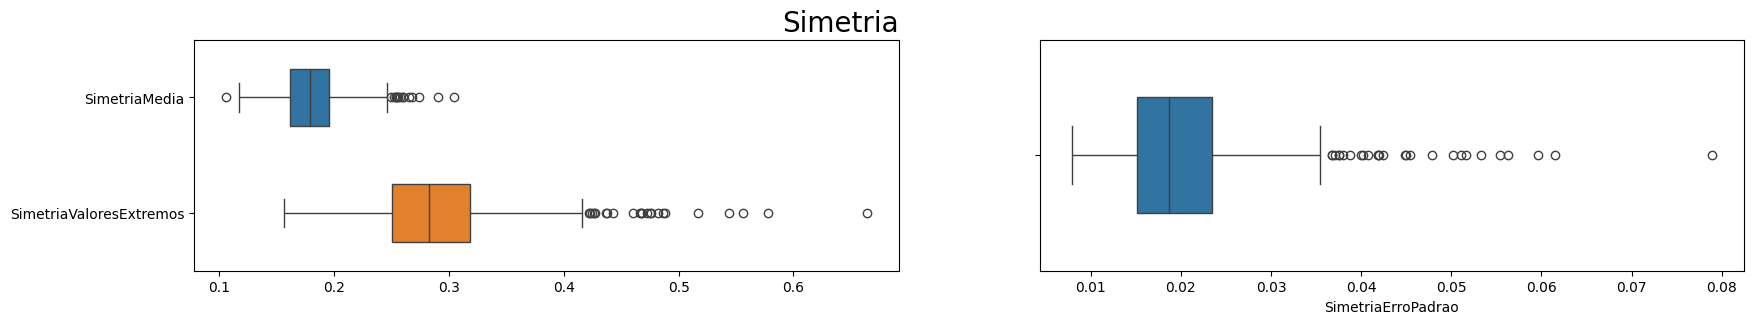

In [ ]:
simetria_df = pd.DataFrame()
simetria_df["SimetriaMedia"] = df.symmetry1
simetria_df["SimetriaErroPadrao"] = df.symmetry2
simetria_df["SimetriaValoresExtremos"] = df.symmetry3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_9 = sns.boxplot(data = [simetria_df.SimetriaMedia,simetria_df.SimetriaValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_9.set_title("Simetria",fontsize = 20,loc="right")
boxplot_9 = sns.boxplot(data = simetria_df.SimetriaErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_9

In [ ]:
tabela_simetria = pd.DataFrame([pedaco_descricao.symmetry1,pedaco_descricao.symmetry3,pedaco_descricao.symmetry2])
tabela_simetria.rename({"symmetry1": "SimetriaMedia","symmetry2": "SimetriaErroPadrao","symmetry3": "SimetriaValoresExtremos"},axis=0,inplace=True)
tabela_simetria

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.16190,0.17920,0.19570,0.725609,1.287933,0.16010,0.181162
SimetriaValoresExtremos,0.25040,0.28220,0.31790,1.433928,4.444560,0.22260,0.290076
SimetriaErroPadrao,0.01516,0.01873,0.02348,2.195133,7.896130,0.01344,0.020542


#### Outliers da simetria

A presença de outliers é muito elevada em todos os atributos.

#### Distribuição da simetria

A média e os valores extremos indicam simetria e o erro padrão indica uma leve assimetria à direita.

#### Dispersão da simetria

Todos os atributos apresentam uma baixa dispersão.

<Axes: xlabel='DimensaoFractalErroPadrao'>

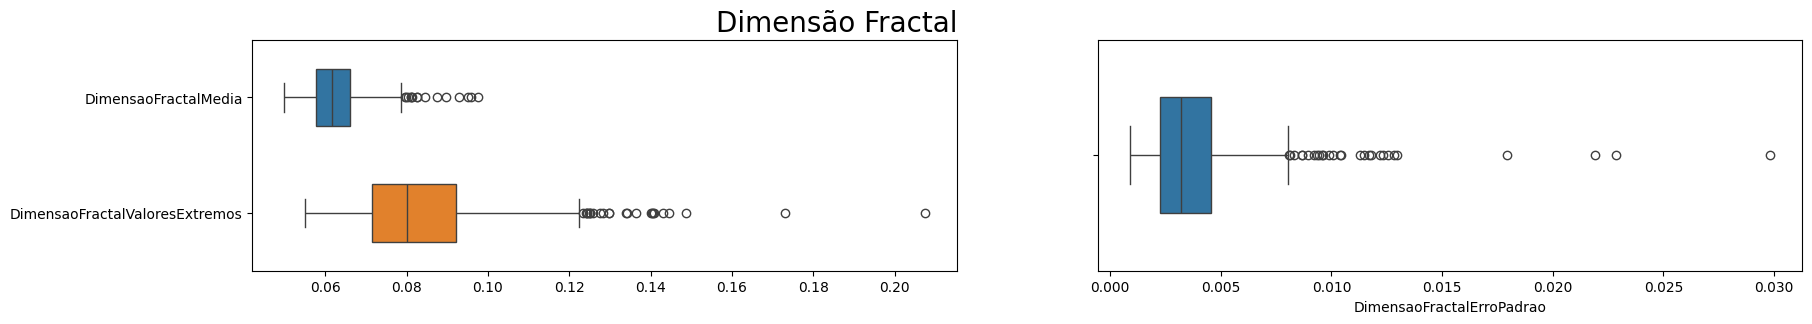

In [ ]:
dimensao_fractal_df = pd.DataFrame()
dimensao_fractal_df["DimensaoFractalMedia"] = df.fractal_dimension1
dimensao_fractal_df["DimensaoFractalErroPadrao"] = df.fractal_dimension2
dimensao_fractal_df["DimensaoFractalValoresExtremos"] = df.fractal_dimension3

imagem, eixo = plt.subplots(1,2,figsize=(20,3))

boxplot_10 = sns.boxplot(data = [dimensao_fractal_df.DimensaoFractalMedia,dimensao_fractal_df.DimensaoFractalValoresExtremos], orient = "h", width=0.5,ax=eixo[0])
boxplot_10.set_title("Dimensão Fractal",fontsize = 20,loc="right")
boxplot_10 = sns.boxplot(data = dimensao_fractal_df.DimensaoFractalErroPadrao, orient = "h", width=0.5,ax=eixo[1])

boxplot_10

In [ ]:
tabela_dimensao_fractal = pd.DataFrame([pedaco_descricao.fractal_dimension1,pedaco_descricao.fractal_dimension3,pedaco_descricao.fractal_dimension2])
tabela_dimensao_fractal.rename({"fractal_dimension1": "DimensaoFractalMedia","fractal_dimension2": "DimensaoFractalErroPadrao","fractal_dimension3": "DimensaoFractalValoresExtremos"},axis=0,inplace=True)
tabela_dimensao_fractal

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.057700,0.061540,0.066120,1.304489,3.005892,0.056670,0.062798
DimensaoFractalValoresExtremos,0.071460,0.080040,0.092080,1.662579,5.244611,0.074270,0.083946
DimensaoFractalErroPadrao,0.002248,0.003187,0.004558,3.923969,26.280847,0.001784,0.003795


#### Outliers da dimensão fractal

A presença de outliers é muito significativa.

#### Distribuição da dimensão fractal

O erro padrão e os valores extremos indicam uma leve assimetria à direita, sendo mais atenuado no erro padrão do atributo. A média indica uma simetria.

#### Dispersão da dimensão fractal

Os valores extremos apresentam muita dispersão e os demais atributos estão relativamente concentrados.

### g) Plote histogramas dos atributos (compare seu comportamento com as medidas da estatística descritiva, anteriormente calculadas) e interprete sua distribuição, considerando as classes.

<Axes: xlabel='RaioErroPadrao', ylabel='Frequência'>

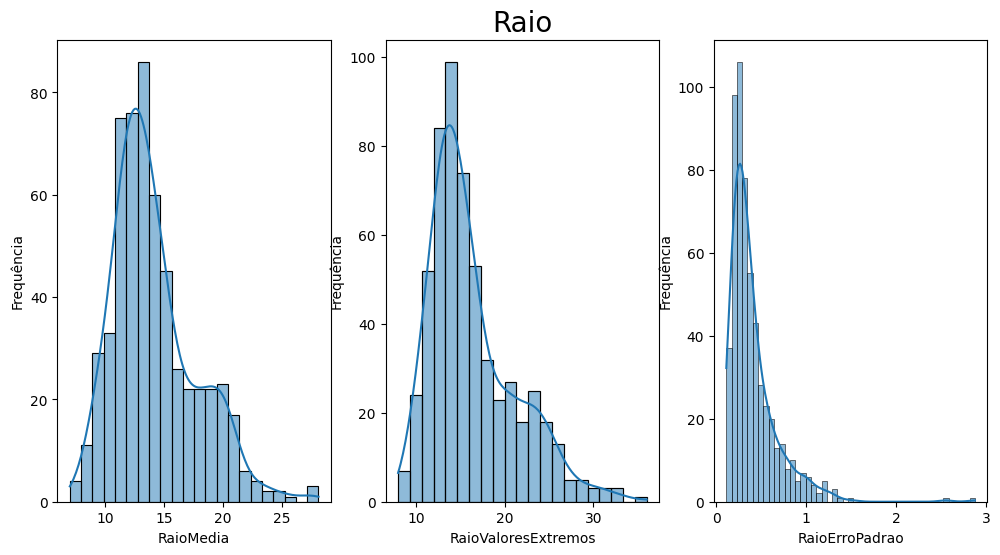

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_1 = sns.histplot(raio_df.RaioMedia,kde=True,ax=eixo[0])
histograma_1.set_ylabel("Frequência")
histograma_1 = sns.histplot(raio_df.RaioValoresExtremos,kde=True,ax=eixo[1])
histograma_1.set_ylabel("Frequência")
histograma_1.set_title("Raio",fontsize=20)
histograma_1 = sns.histplot(raio_df.RaioErroPadrao,kde=True,ax=eixo[2])
histograma_1.set_ylabel("Frequência")
histograma_1


In [ ]:
tabela_raio

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
RaioMedia,11.7000,13.3700,15.7800,0.942380,0.845522,12.3400,14.127292
RaioValoresExtremos,13.0100,14.9700,18.7900,1.103115,0.944090,12.3600,16.269190
RaioErroPadrao,0.2324,0.3242,0.4789,3.088612,17.686726,0.2204,0.405172


#### RaioMedia

A distribuição é semelhante à normal, comparando a moda com a mediana e a média pode-se dizer que a distribuição é assimétrica à direita, o que é corroborado pela obliquidade > 0 e pelo histograma. Além disso pode-se observar que o gráfico é "pontiagudo" o que já era esperado dado que a curtose > 0.

#### RaioValoresExtremos

Suas características são quase idênticas à média do atributo exceto pela obliquidade que é maior, ou seja, a distribuição possui uma assimetria mais atenuada à direita.

#### RaioErroPadrao

Características semelhantes aos outros atributos do raio, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma grande assimetria à direita e uma distribuição muito pontiaguda.

<Axes: xlabel='TexturaErroPadrao', ylabel='Frequência'>

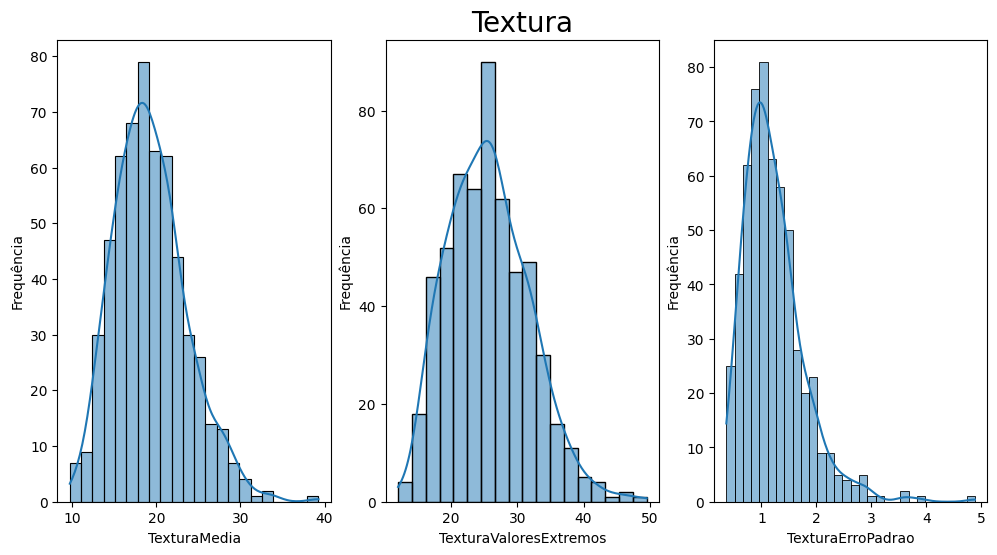

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_2 = sns.histplot(textura_df.TexturaMedia,kde=True,ax=eixo[0])
histograma_2.set_ylabel("Frequência")
histograma_2 = sns.histplot(textura_df.TexturaValoresExtremos,kde=True,ax=eixo[1])
histograma_2.set_ylabel("Frequência")
histograma_2.set_title("Textura",fontsize=20)
histograma_2 = sns.histplot(textura_df.TexturaErroPadrao,kde=True,ax=eixo[2])
histograma_2.set_ylabel("Frequência")
histograma_2


In [ ]:
tabela_textura

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
TexturaMedia,16.1700,18.840,21.800,0.650450,0.758319,14.9300,19.289649
TexturaValoresExtremos,21.0800,25.410,29.720,0.498321,0.224302,17.7000,25.677223
TexturaErroPadrao,0.8339,1.108,1.474,1.646444,5.349169,0.8561,1.216853


#### TexturaMedia

A distribuição é próxima da normal com uma assimetria à direita como já se esperava dado que a obliquidade > 0. Além disso, pode-se observar que o gráfico é mais pontiagudo, sendo corroborado com a curtose que é maior que 0.

#### TexturaValoresExtremos

As características são semelhantes à média do atributo, com uma leve assimetria à direita e com uma altura mais próxima da normal, o que é coerente dado que a curtose é relativamente baixa.

#### TexturaErroPadrao

Apresenta uma distribuição normal com um grau de assimetria à direita e altura muito maior que os outros atributos dado que a obliquidade e curtose são maiores que 0 e muito elevadas.

<Axes: xlabel='PerimetroErroPadrao', ylabel='Frequência'>

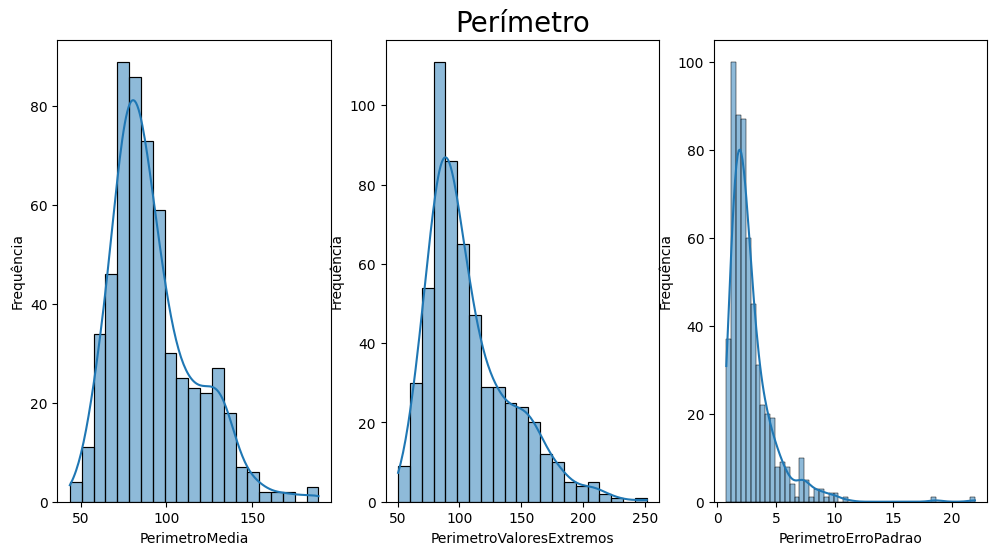

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_3 = sns.histplot(perimetro_df.PerimetroMedia,kde=True,ax=eixo[0])
histograma_3.set_ylabel("Frequência")
histograma_3 = sns.histplot(perimetro_df.PerimetroValoresExtremos,kde=True,ax=eixo[1])
histograma_3.set_ylabel("Frequência")
histograma_3.set_title("Perímetro",fontsize=20)
histograma_3 = sns.histplot(perimetro_df.PerimetroErroPadrao,kde=True,ax=eixo[2])
histograma_3.set_ylabel("Frequência")
histograma_3


In [ ]:
tabela_perimetro

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PerimetroMedia,75.170,86.240,104.100,0.990650,0.972214,82.610,91.969033
PerimetroValoresExtremos,84.110,97.660,125.400,1.128164,1.070150,101.700,107.261213
PerimetroErroPadrao,1.606,2.287,3.357,3.443615,21.401905,1.778,2.866059


#### PerimetroMedia

A distribuição é semelhante à normal, com uma grande assimetria à direita e uma distribuição muito pontiaguda.

#### PerimetroValoresExtremos

Suas características são quase idênticas à média do atributo, mas com uma obliquidade e curtose maiores.

#### PerimetroErroPadrao

Características semelhantes aos outros atributos do perímetro, mas dado o grau de obliquidade e curtose, pode-se observar uma grande assimetria à direita e uma distribuição extremamente pontiaguda.

<Axes: xlabel='AreaErroPadrao', ylabel='Frequência'>

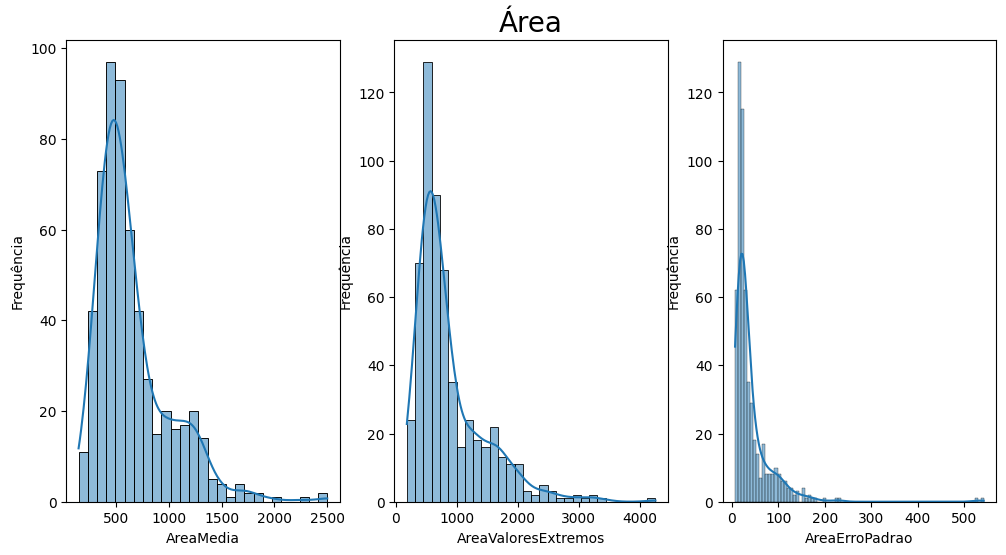

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_4 = sns.histplot(area_df.AreaMedia,kde=True,ax=eixo[0])
histograma_4.set_ylabel("Frequência")
histograma_4 = sns.histplot(area_df.AreaValoresExtremos,kde=True,ax=eixo[1])
histograma_4.set_ylabel("Frequência")
histograma_4.set_title("Área",fontsize=20)
histograma_4 = sns.histplot(area_df.AreaErroPadrao,kde=True,ax=eixo[2])
histograma_4.set_ylabel("Frequência")
histograma_4


In [ ]:
tabela_area

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
AreaMedia,420.30,551.10,782.70,1.645732,3.652303,512.20,654.889104
AreaValoresExtremos,515.30,686.50,1084.00,1.859373,4.396395,284.40,880.583128
AreaErroPadrao,17.85,24.53,45.19,5.447186,49.209077,16.64,40.337079


#### AreaMedia

A distribuição é semelhante à normal, com uma grande assimetria à direita e com uma distribuição pontiaguda assim como era esperado dado que a obliquidade > 0 e a curtose > 0.

#### AreaValoresExtremos

Suas características são quase idênticas à média do atributo exceto pela curtose que é maior, ou seja, a distribuição é mais pontiaguda.

#### AreaErroPadrao

Características semelhantes aos outros atributos da área, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma grande assimetria à direita e uma distribuição extremamente pontiaguda.

<Axes: xlabel='SuavidadeErroPadrao', ylabel='Frequência'>

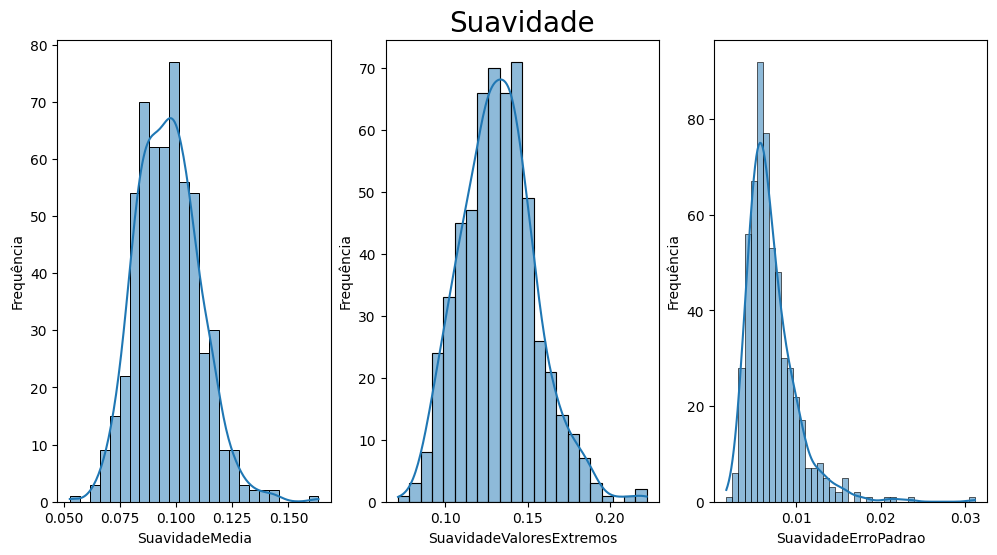

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_5 = sns.histplot(suavidade_df.SuavidadeMedia,kde=True,ax=eixo[0])
histograma_5.set_ylabel("Frequência")
histograma_5 = sns.histplot(suavidade_df.SuavidadeValoresExtremos,kde=True,ax=eixo[1])
histograma_5.set_ylabel("Frequência")
histograma_5.set_title("Suavidade",fontsize=20)
histograma_5 = sns.histplot(suavidade_df.SuavidadeErroPadrao,kde=True,ax=eixo[2])
histograma_5.set_ylabel("Frequência")
histograma_5


In [ ]:
tabela_suavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SuavidadeMedia,0.086370,0.09587,0.105300,0.456324,0.855975,0.10070,0.096360
SuavidadeValoresExtremos,0.116600,0.13130,0.146000,0.415426,0.517825,0.12160,0.132369
SuavidadeErroPadrao,0.005169,0.00638,0.008146,2.314450,10.469840,0.00508,0.007041


#### SuavidadeMedia

A distribuição é muito próxima à normal, com uma pequena assimetria à direita e com uma distribuição pontiaguda assim como era esperado dado que a obliquidade > 0 e a curtose > 0.

#### SuavidadeValoresExtremos

Suas características são quase idênticas à média do atributo exceto pela curtose que é menor, ou seja, a distribuição possui uma altura mais próxima da normal.

#### SuavidadeErroPadrao

Características semelhantes aos outros atributos da suavidade, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma grande assimetria à direita e uma distribuição extremamente pontiaguda.

#### Observação

É importante considerar que a diferença da moda, da mediana e da média dos atributos é muito pequena, por mais que a distribuição seja assimétrica.

<Axes: xlabel='CompacidadeErroPadrao', ylabel='Frequência'>

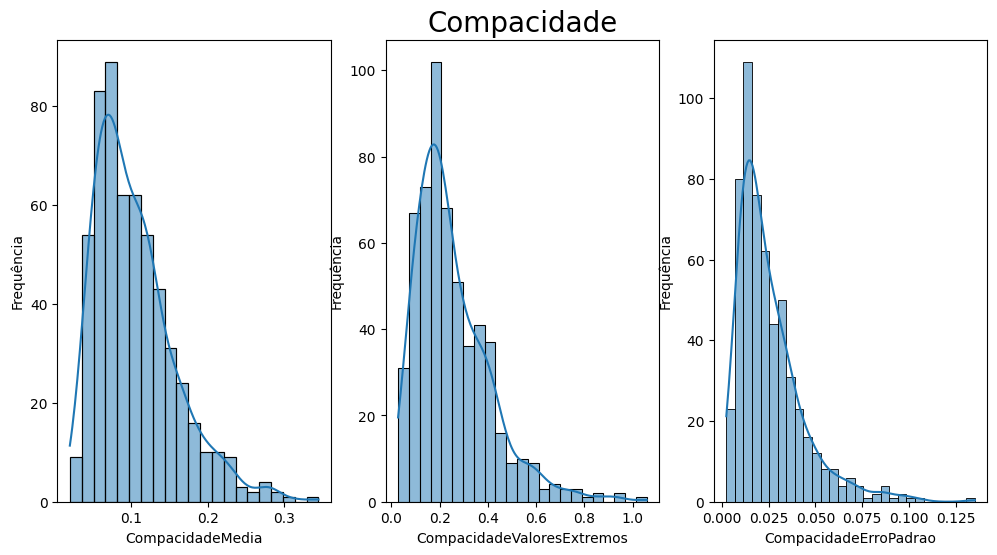

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_6 = sns.histplot(compacidade_df.CompacidadeMedia,kde=True,ax=eixo[0])
histograma_6.set_ylabel("Frequência")
histograma_6 = sns.histplot(compacidade_df.CompacidadeValoresExtremos,kde=True,ax=eixo[1])
histograma_6.set_ylabel("Frequência")
histograma_6.set_title("Compacidade",fontsize=20)
histograma_6 = sns.histplot(compacidade_df.CompacidadeErroPadrao,kde=True,ax=eixo[2])
histograma_6.set_ylabel("Frequência")
histograma_6

In [ ]:
tabela_compacidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
CompacidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
CompacidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
CompacidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### CompacidadeMedia

A distribuição é semelhante à normal, com uma grande assimetria à direita e com uma distribuição pontiaguda assim como era esperado dado que a obliquidade > 0 e a curtose > 0.

#### CompacidadeValoresExtremos

Suas características são quase idênticas à média do atributo exceto pela curtose que é menor, ou seja, a distribuição é menos pontiaguda.

#### CompacidadeErroPadrao

Características semelhantes aos outros atributos da compacidade, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma grande assimetria à direita e uma distribuição extremamente pontiaguda.

<Axes: xlabel='ConcavidadeErroPadrao', ylabel='Frequência'>

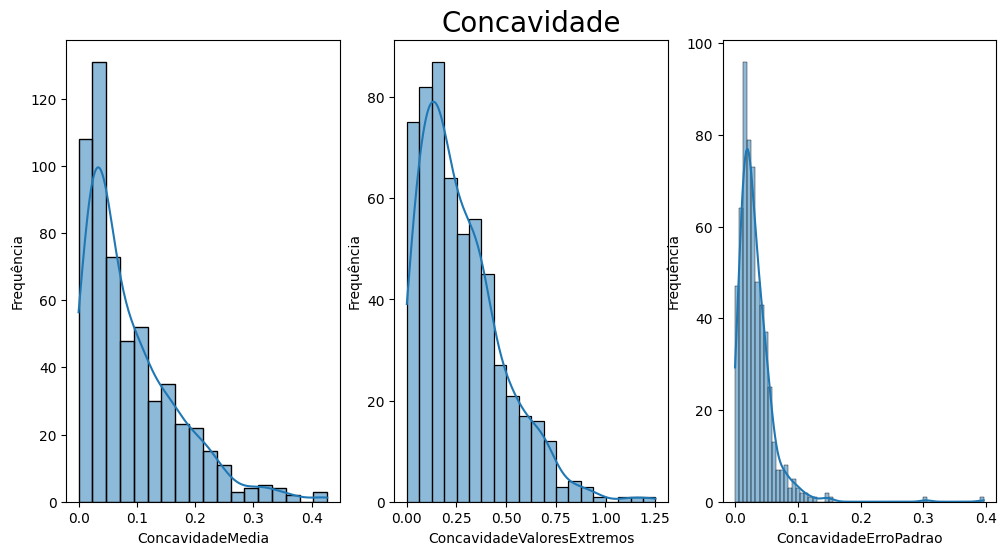

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_7 = sns.histplot(concavidade_df.ConcavidadeMedia,kde=True,ax=eixo[0])
histograma_7.set_ylabel("Frequência")
histograma_7 = sns.histplot(concavidade_df.ConcavidadeValoresExtremos,kde=True,ax=eixo[1])
histograma_7.set_ylabel("Frequência")
histograma_7.set_title("Concavidade",fontsize=20)
histograma_7 = sns.histplot(concavidade_df.ConcavidadeErroPadrao,kde=True,ax=eixo[2])
histograma_7.set_ylabel("Frequência")
histograma_7

In [ ]:
tabela_concavidade

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
ConcavidadeMedia,0.02956,0.06154,0.13070,1.401180,1.998638,0.0,0.088799
ConcavidadeValoresExtremos,0.11450,0.22670,0.38290,1.150237,1.615253,0.0,0.272188
ConcavidadeErroPadrao,0.01509,0.02589,0.04205,5.110463,48.861395,0.0,0.031894


#### ConcavidadeMedia

A distribuição é semelhante à normal, mas extremamente assimétrica à direita e com uma distribuição pontiaguda corroborado pela obliquidade > 0 e a curtose > 0.

#### ConcavidadeValoresExtremos

Sua distribuição se assemelha mais à distribuição normal que a média do atributo, mas ainda apresenta uma grande assimetria à direita e sendo muito pontiaguda como já era esperado dado a obliquidade e curtose que são maiores que 0.

#### ConcavidadeErroPadrao

Características semelhantes aos outros atributos da concavidade, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma grande assimetria à direita e uma distribuição extremamente pontiaguda.

<Axes: xlabel='PontosConcavosErroPadrao', ylabel='Frequência'>

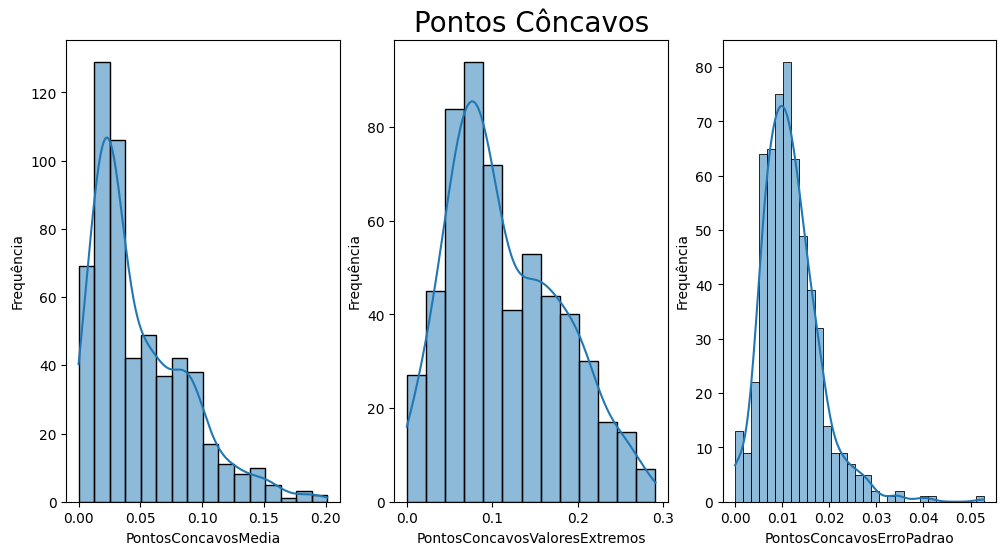

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosMedia,kde=True,ax=eixo[0])
histograma_8.set_ylabel("Frequência")
histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosValoresExtremos,kde=True,ax=eixo[1])
histograma_8.set_ylabel("Frequência")
histograma_8.set_title("Pontos Côncavos",fontsize=20)
histograma_8 = sns.histplot(pontos_concavos_df.PontosConcavosErroPadrao,kde=True,ax=eixo[2])
histograma_8.set_ylabel("Frequência")
histograma_8

In [ ]:
tabela_ponto_concavos

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
PontosConcavosMedia,0.020310,0.03350,0.07400,1.171180,1.066556,0.0,0.048919
PontosConcavosValoresExtremos,0.064930,0.09993,0.16140,0.492616,-0.535535,0.0,0.114606
PontosConcavosErroPadrao,0.007638,0.01093,0.01471,1.444678,5.126302,0.0,0.011796


#### PontosConcavosMedia

A distribuição é semelhante à normal, mas extremamente assimétrica à direita e com uma distribuição pontiaguda dado que a obliquidade > 0 e a curtose > 0.

#### PontosConcavosValoresExtremos

A distribuição é semelhante à normal, com uma assimetria à direita, obliquidade > 0, e com uma distribuição mais achatada dado que a curtose < 0.

#### PontosConcavosErroPadrao

A distribuição é semelhante à normal, mas com uma assimetria à direita e apresentando um gráfico mais pontiagudo, com obliquidade e curtose maiores que 0.

#### Observação
É importante considerar que a diferença da moda, da mediana e da média do erro padrão é muito pequena, por mais que a distribuição seja assimétrica.

<Axes: xlabel='SimetriaErroPadrao', ylabel='Frequência'>

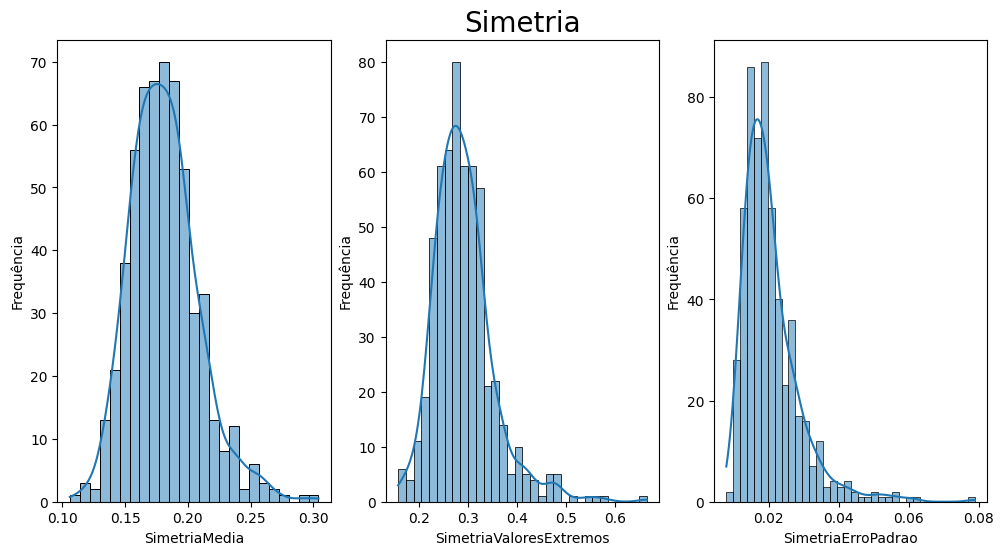

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_9 = sns.histplot(simetria_df.SimetriaMedia,kde=True,ax=eixo[0])
histograma_9.set_ylabel("Frequência")
histograma_9 = sns.histplot(simetria_df.SimetriaValoresExtremos,kde=True,ax=eixo[1])
histograma_9.set_ylabel("Frequência")
histograma_9.set_title("Simetria",fontsize=20)
histograma_9 = sns.histplot(simetria_df.SimetriaErroPadrao,kde=True,ax=eixo[2])
histograma_9.set_ylabel("Frequência")
histograma_9

In [ ]:
tabela_simetria

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
SimetriaMedia,0.16190,0.17920,0.19570,0.725609,1.287933,0.16010,0.181162
SimetriaValoresExtremos,0.25040,0.28220,0.31790,1.433928,4.444560,0.22260,0.290076
SimetriaErroPadrao,0.01516,0.01873,0.02348,2.195133,7.896130,0.01344,0.020542


#### SimetriaMedia

A distribuição é muito próxima da normal, mas com uma assimetria à direita e com uma distribuição pontiaguda dado que a obliquidade > 0 e a curtose > 0.

#### SimetriaValoresExtremos

Distribuição com características semelhantes à media do atributo, mas com maior obliquidade e curtose.

#### SimetriaErroPadrao

Características semelhantes aos outros atributos da simetria, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma maior assimetria à direita e uma distribuição mais pontiaguda.

### Observação
É importante considerar que a diferença da média, da mediana e da moda da média da simetria é muito pequena, por mais que a distribuição seja assimétrica.

<Axes: xlabel='DimensaoFractalErroPadrao', ylabel='Frequência'>

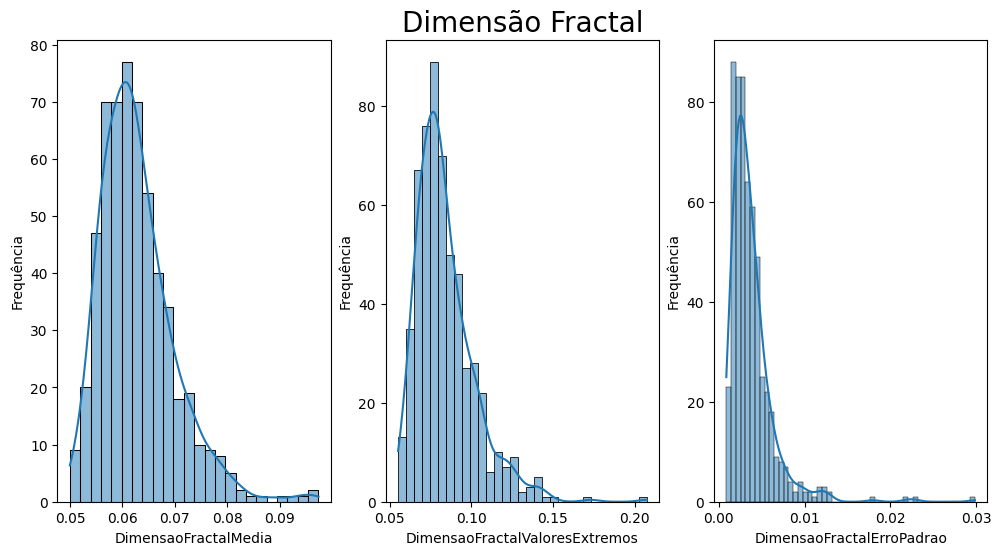

In [ ]:
imagem, eixo = plt.subplots(1,3,figsize=(12,6))
histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalMedia,kde=True,ax=eixo[0])
histograma_10.set_ylabel("Frequência")
histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalValoresExtremos,kde=True,ax=eixo[1])
histograma_10.set_ylabel("Frequência")
histograma_10.set_title("Dimensão Fractal",fontsize=20)
histograma_10 = sns.histplot(dimensao_fractal_df.DimensaoFractalErroPadrao,kde=True,ax=eixo[2])
histograma_10.set_ylabel("Frequência")
histograma_10

In [ ]:
tabela_dimensao_fractal

,Q1 (25%),Mediana,Q3 (75%),Obliquidade,Curtose,Moda,Média
DimensaoFractalMedia,0.057700,0.061540,0.066120,1.304489,3.005892,0.056670,0.062798
DimensaoFractalValoresExtremos,0.071460,0.080040,0.092080,1.662579,5.244611,0.074270,0.083946
DimensaoFractalErroPadrao,0.002248,0.003187,0.004558,3.923969,26.280847,0.001784,0.003795


#### DimensaoFractalMedia

A distribuição é muito próxima da normal, mas com uma assimetria à direita e com uma distribuição pontiaguda dado que a obliquidade > 0 e a curtose > 0.

#### DimensaoFractalValoresExtremos

Distribuição com características semelhantes à media do atributo, mas com maior obliquidade e curtose.

#### DimensaoFractalErroPadrao

Características semelhantes aos outros atributos da dimensao fractal, mas dado o grau de obliquidade e curtose, pode-se observar no gráfico que há uma maior assimetria à direita e uma distribuição mais pontiaguda.

#### Observação
É importante considerar que a diferença da moda, da mediana e da média dos atributos é muito pequena, por mais que a distribuição seja assimétrica.

### h) Promova uma transformação de dados consistente com o banco sob análise

Como foi possível perceber pela plotagem dos gráficos anteriores, os **atributos físicos (área, perimetro, etc.)** apresentam alta incidência de *outliers*. Assim, pode-se aplicar uma técnica de **normalização por amplitude**, a **padronização**:

In [ ]:
# Seleciona os atributos preditivos (ignorando ID e Diagnosis)
X = df

# Aplica a padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converte o resultado para DataFrame com os mesmos nomes de colunas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Exibe os primeiros valores transformados
X_scaled_df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


A padronização dos atributos preditivos foi aplicada utilizando `StandardScaler`, que transforma os dados para que tenham média zero e desvio padrão igual a um.

Essa transformação faz sentido para o conjunto de dados Breast Cancer Wisconsin Diagnostic por três motivos principais:

1. **Atributos com escalas muito diferentes** — características como `area1` e `smoothness1` têm ordens de grandeza distintas. Sem padronização, algoritmos sensíveis à escala poderiam atribuir mais importância a atributos com valores numericamente maiores, mesmo que não sejam mais relevantes.

2. **Preservação da distribuição** — a padronização mantém a forma da distribuição dos dados (incluindo outliers e assimetrias), permitindo análise posterior sem distorção estatística.

3. **Pré-requisito para técnicas como PCA** — que se baseiam em variância, a padronização garante que nenhum atributo domine artificialmente a análise de componentes principais.

Portanto, a padronização contribui para uma análise mais justa e confiável.


### i) Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos

O **PCA (Principal Components Analysis)** transforma os dados em um novo sistema de coordenadas, onde: o primeiro componente explica a maior variância possível; o segundo componente explica a maior variância restante (e assim por diante); os novos "atributos" (componentes principais) são combinações lineares dos atributos originais

In [ ]:
# Aplica PCA nos dados já padronizados
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Converte para DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["Diagnosis"] = dt["Diagnosis"].values # Reanexa as classes

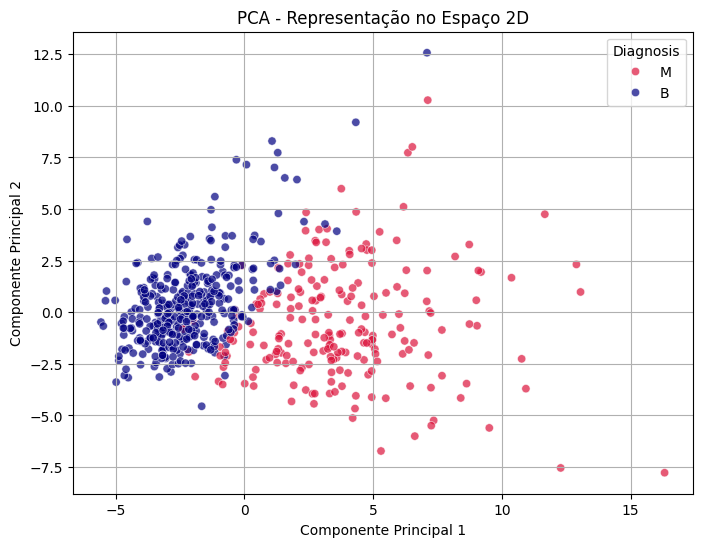

In [ ]:
# Plotagem dos dois primeiros componentes principais
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Diagnosis",
    data=df_pca, palette=["crimson", "navy"], alpha=0.7
)
plt.title("PCA - Representação no Espaço 2D")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()